# SAT NETs for the AoA
May 2022

This notebook calculates NETs for a variety of SAT configurations, sited at the South Pole and in Chile, for comparision.  The model currently uses flat bands.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yaml
from jbolo_funcs import *

%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]


In [50]:
# List what yaml files you have so you can choose one for the next line.
!ls yamls 

SAT_HWP_20220507.yaml      SAT_baseline_20220507.yaml
SAT_HWP_20220627.yaml      SAT_baseline_20220627.yaml


We're going to do this a very simple way, where we explicitly run each sim and plot it before moving on to the next.


Pole baseline flam:      1.84  2.77  1.86  1.95  3.17  3.19  2.72  3.42
corr:                    1.03  1.01  1.03  1.02  1.00  1.00  1.01  1.00  

Pole, more spill flam:   1.44  2.18  1.46  1.54  2.49  2.50  2.72  3.42
corr:                    1.03  1.01  1.03  1.03  1.00  1.01  1.01  1.00  

Atacama option 1 flam:   1.84  2.77  1.86  1.95  3.17  3.19  2.72  3.42
corr:                    1.03  1.01  1.03  1.02  1.00  1.00  1.01  1.00  

Atacama option 2 flam:   1.84  2.77  1.86  1.95  3.17  3.19  2.72  3.42
corr:                    1.03  1.01  1.02  1.02  1.00  1.00  1.01  1.00  

Atacama option 3 flam:   1.45  2.18  1.46  1.54  2.49  2.51  2.13  2.68
corr:                    1.03  1.01  1.03  1.03  1.00  1.01  1.01  1.01  

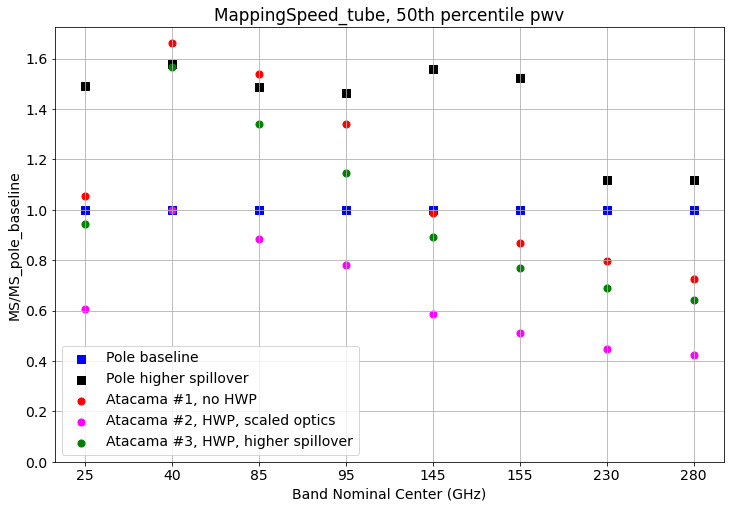

In [51]:
###### South Pole Baseline
print('Pole baseline flam:'.ljust(23), end='')
sim = yaml.safe_load(open('yamls/SAT_baseline_20220627.yaml'))
sim['bolo_config']['f_number']=1.45
run_optics(sim)
run_bolos(sim)
#optically good detectors in one tube, from https://docs.google.com/presentation/d/1LDfZQvVTwUrymkodsj5cSliLxPjmVU3uN6-Ad17SQ1g/edit#slide=id.g1276d6665ee_0_27
yvec=np.array([])
ndet = [252, 252, 3084, 3552,3084,3552,10008, 10008 ] 
iivec = np.arange(len(ndet))
ii = 0
for ch in sim['outputs'].keys():
    net1det = 1e6*sim['outputs'][ch]['NET_C_total']
    net = net1det/np.sqrt(ndet[ii])
    ms = 1/net**2
    yvec = np.append(yvec,ms)
    ii += 1
    print('{0:6.2f}'.format(sim['outputs'][ch]['det_pitch_flam']),end='')
print()
print('corr:'.ljust(25),end='')
for ch in sim['outputs'].keys():
    print('{0:4.2f}  '.format(sim['outputs'][ch]['corr_factor']),end='')
yvec0 = yvec
plt.scatter(iivec,yvec/yvec0,s=50,color='blue',marker='s',label='Pole baseline')

## South Pole more spillover
print('\n')
sim['outputs'].clear()
sim = yaml.safe_load(open('yamls/SAT_baseline_20220627.yaml'))
sim['bolo_config']['f_number']=1.45
# Spillover in LF and MF set to same as atacama option 3, but HF same as baseline because 
# we're just calling more detectors good without changing the hf horn size.
sim['optical_elements']['lyot']['absorption']= [0.269, 0.175, 0.318, 0.269, 0.128, 0.175, 0.141,0.079]
for ch in sim['channels'].keys():
    if ((ch != 'HF_1') and (ch != 'HF_2')):
        sim['channels'][ch]['horn_diameter']=(44/56.)*sim['channels'][ch]['horn_diameter']
        sim['channels'][ch]['pixel_spacing']=(44/56.)*sim['channels'][ch]['pixel_spacing']
run_optics(sim)
run_bolos(sim)
#optically good detectors in one tube, from https://docs.google.com/presentation/d/1LDfZQvVTwUrymkodsj5cSliLxPjmVU3uN6-Ad17SQ1g/edit#slide=id.g1276d6665ee_0_27
yvec=np.array([])
ndet = [408, 408, 4996, 5756,4996,5756,11208, 11208 ] 
iivec = np.arange(len(ndet))
ii = 0
print('Pole, more spill flam:'.ljust(23),end='')
for ch in sim['outputs'].keys():
    net1det = 1e6*sim['outputs'][ch]['NET_C_total']
    net = net1det/np.sqrt(ndet[ii])
    ms = 1/net**2
    yvec = np.append(yvec,ms)
    ii += 1
    print('{0:6.2f}'.format(sim['outputs'][ch]['det_pitch_flam']),end='')
print()
print('corr:'.ljust(25),end='')
for ch in sim['outputs'].keys():
    print('{0:4.2f}  '.format(sim['outputs'][ch]['corr_factor']),end='')
plt.scatter(iivec,yvec/yvec0,s=50,color='black',marker='s',label='Pole higher spillover')


print('\n')
print('Atacama option 1 flam:'.ljust(23),end='')
# Atacama, baseline model, no hwp
sim['outputs'].clear()
sim = yaml.safe_load(open('yamls/SAT_baseline_20220627.yaml'))
sim['bolo_config']['f_number']=1.45
sim['sources']['atmosphere']['site']='Atacama'
sim['sources']['atmosphere']['pwv'] = 993
run_optics(sim)
run_bolos(sim)
ndet = [252, 252, 3084, 3552,3084,3552,10008, 10008 ]
iivec = np.arange(len(ndet))
ii = 0
yvec=np.array([])
for ch in sim['outputs'].keys():
    net1det = 1e6*sim['outputs'][ch]['NET_C_total']
    net = net1det/np.sqrt(ndet[ii])
    ms = 1/net**2
    yvec = np.append(yvec,ms)
    ii += 1
    print('{0:6.2f}'.format(sim['outputs'][ch]['det_pitch_flam']),end='')
print()
print('corr:'.ljust(25),end='')
for ch in sim['outputs'].keys():
    print('{0:4.2f}  '.format(sim['outputs'][ch]['corr_factor']),end='')
plt.scatter(iivec,yvec/yvec0,s=50,color='red',label='Atacama #1, no HWP')


print('\n')
print('Atacama option 2 flam:'.ljust(23),end='')
# Atacama, option 2, hwp, scaled optics so same spillover, fewer detectors in each band
sim['outputs'].clear()
sim = yaml.safe_load(open('yamls/SAT_HWP_20220627.yaml'))
sim['bolo_config']['f_number']=1.45
sim['sources']['atmosphere']['site']='Atacama'
sim['sources']['atmosphere']['pwv'] = 993
run_optics(sim)
run_bolos(sim)
yvec=np.array([])
ndet = [162, 162, 2016, 2340 ,2016,2340, 6528, 6528 ]
iivec = np.arange(len(ndet))
ii = 0
for ch in sim['outputs'].keys():
    net1det = 1e6*sim['outputs'][ch]['NET_C_total']
    net = net1det/np.sqrt(ndet[ii])
    ms = 1/net**2
    yvec = np.append(yvec,ms)
    ii += 1
    print('{0:6.2f}'.format(sim['outputs'][ch]['det_pitch_flam']),end='')
print()
print('corr:'.ljust(25),end='')
for ch in sim['outputs'].keys():
    print('{0:4.2f}  '.format(sim['outputs'][ch]['corr_factor']),end='')
plt.scatter(iivec,yvec/yvec0,s=50,color='magenta',label='Atacama #2, HWP, scaled optics')



print('\n')
print('Atacama option 3 flam:'.ljust(23),end='')
# Atacama, option 3, same number of detectors in each band as baseline, but higher spillover on cold stop
sim['outputs'].clear()
sim = yaml.safe_load(open('yamls/SAT_HWP_20220627.yaml'))
sim['bolo_config']['f_number'] = 1.845
sim['sources']['atmosphere']['site']='Atacama'
sim['sources']['atmosphere']['pwv'] = 993
sim['optical_elements']['lyot']['absorption']=[0.269, 0.175, 0.318, 0.269, 0.128, 0.175, 0.269, 0.175]
run_optics(sim)
run_bolos(sim)
yvec=np.array([])
ndet = [252, 252, 3084, 3552,3084,3552,10008, 10008 ]
iivec = np.arange(len(ndet))
ii = 0
for ch in sim['outputs'].keys():
    net1det = 1e6*sim['outputs'][ch]['NET_C_total']
    net = net1det/np.sqrt(ndet[ii])
    ms = 1/net**2
    yvec = np.append(yvec,ms)
    ii += 1
    print('{0:6.2f}'.format(sim['outputs'][ch]['det_pitch_flam']),end='')
print()
print('corr:'.ljust(25),end='')
for ch in sim['outputs'].keys():
    print('{0:4.2f}  '.format(sim['outputs'][ch]['corr_factor']),end='')
plt.scatter(iivec,yvec/yvec0,s=50,color='green',label='Atacama #3, HWP, higher spillover')

plt.ylim(0)
my_xticks = ['25','40','85','95','145','155','230','280']
plt.xticks(iivec, my_xticks)
plt.title('MappingSpeed_tube, 50th percentile pwv')
plt.ylabel('MS/MS_pole_baseline')
plt.xlabel('Band Nominal Center (GHz)')
plt.grid()
plt.legend()


# NET vs pwv 

Calculate and print to a yaml file.


In [6]:
def sim_setup_from_option(option):
    # This sets up jbolo to do single-detector NETs and correlation factors only, 
    # does not try to deal with changes in detector counts for these options.
    
    if option == 0:
        # Pole baseline
        yamlfile = 'yamls/SAT_baseline_20220627.yaml'
        sim = yaml.safe_load(open(yamlfile))
        sim['bolo_config']['f_number']=1.45
        
    if option == 1:
        # Changing horn size of LF and MF to have more spillover, but higher detector count
        yamlfile = 'yamls/SAT_baseline_20220627.yaml'
        sim = yaml.safe_load(open(yamlfile))
        sim['bolo_config']['f_number']=1.45
        # Spillover in LF and MF set to same as atacama option 3, but HF same as baseline because 
        # we're just calling more detectors good without changing the hf horn size.
        sim['optical_elements']['lyot']['absorption']= [0.269, 0.175, 0.318, 0.269, 0.128, 0.175, 0.141,0.079]
        for ch in sim['channels'].keys():
            if ((ch != 'HF_1') and (ch != 'HF_2')):
                sim['channels'][ch]['horn_diameter']=(44/56.)*sim['channels'][ch]['horn_diameter']
                sim['channels'][ch]['pixel_spacing']=(44/56.)*sim['channels'][ch]['pixel_spacing']
        
    if option == 2:
        # with HWP in the optics chain, optics scaled to give same f/# as baseline.
        yamlfile = 'yamls/SAT_hwp_20220627.yaml'
        sim = yaml.safe_load(open(yamlfile))
        sim['bolo_config']['f_number']=1.45
        
    if option == 3:
        # with HWP, keeping horn sizes same so changing f/# there.
        yamlfile = 'yamls/SAT_hwp_20220627.yaml'
        sim = yaml.safe_load(open(yamlfile))
        sim['bolo_config']['f_number'] = 1.845
        sim['optical_elements']['lyot']['absorption']=[0.269, 0.175, 0.318, 0.269, 0.128, 0.175, 0.269, 0.175]
        
    return(sim)
        

# NET vs pwv

In [62]:
# Define which instrument version to use, and which site, and what toml file output name to use.

# What instrument option:
#  0 = baseline, no hwp
#  1 = higher spill in LF/MF, no hwp
#  2 = hwp, scaled optics so same spill as baseline
#  3 = hwp, higher f/# so higher spill (all bands)
option_str = ['0: No HWP, baseline', 
              '1: No HWP, higher spill in LF/MF',
              '2: HWP, scaled optics, same spill as baseline',
              '3: HWP, higher f/$ so higher spill (all bands)'
             ]
# set option to run
option = 2 
# set other things
site = "Atacama"   # or Atacama, Pole
elev0 = 50 # degrees
pwv0 = 993 # default pwv in microns, typ 321 for Pole or 993 for Atacama
toml_output_file = 'SAT_NET_v_pwv_'+site+'_option_'+str(option)+'.toml'

sim = sim_setup_from_option(option)
sim['sources']['atmosphere']['site']= site
sim['sources']['atmosphere']['pwv'] = pwv0
sim['sources']['atmosphere']['elevation'] = elev0

# pwv's we want to calculate for
pwv_vec = np.arange(0,5000,100)

# Start setting up the output dictionary
my_dict = {}
my_dict['SAT configuration'] = option_str[option]
my_dict['pwv']=pwv_vec
my_dict['elevation']=elev0
my_dict['site']=site

chlist = sim['channels'].keys()
for ch in chlist:
    my_dict[ch] = {}
    my_dict[ch]['NET_NC']=np.array([])
    my_dict[ch]['corr_factor']=np.array([])

# Run jbolo in a loop to fill that dictionary
for pwv in pwv_vec:
    if 'outputs' in sim.keys():  
        sim['outputs'].clear()  # Clear previous iteration results so things don't multiply.

    sim['sources']['atmosphere']['pwv']=pwv
    print(pwv,', ', end='')
    run_optics(sim)
    run_bolos(sim)
    
    for ch in chlist:
        my_dict[ch]['NET_NC']   =np.append(my_dict[ch]['NET_NC'],     sim['outputs'][ch]['NET_NC_total'])
        my_dict[ch]['corr_factor']=np.append(my_dict[ch]['corr_factor'],sim['outputs'][ch]['corr_factor' ])
        
with open(toml_output_file, "w") as toml_file:
    toml.dump(my_dict, toml_file, encoder=toml.TomlNumpyEncoder())


0 , 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 3900 , 4000 , 4100 , 4200 , 4300 , 4400 , 4500 , 4600 , 4700 , 4800 , 4900 , 

# NET vs elevation

In [90]:
# Define which instrument version to use, and which site, and what toml file output name to use.

# What instrument option:
#  0 = baseline, no hwp
#  1 = higher spill in LF/MF, no hwp
#  2 = hwp, scaled optics so same spill as baseline
#  3 = hwp, higher f/# so higher spill (all bands)
option_str = ['0: No HWP, baseline', 
              '1: No HWP, higher spill in LF/MF',
              '2: HWP, scaled optics, same spill as baseline',
              '3: HWP, higher f/$ so higher spill (all bands)'
             ]
# set option to run
option = 0 
# set other things
site = "Pole"   # or Atacama, Pole
elev0 = 50 # degrees
pwv0 = 321 # default pwv in microns, typ 321 for Pole or 993 for Atacama
toml_output_file = 'SAT_NET_v_elev_'+site+'_option_'+str(option)+'.toml'

sim = sim_setup_from_option(option)
sim['sources']['atmosphere']['site']= site
sim['sources']['atmosphere']['pwv'] = pwv0
sim['sources']['atmosphere']['elevation']=elev0
#sim['optical_elements']['window']['thickness']=0.03

# pwv's we want to calculate for
elev_vec = np.arange(30,80,1)

# Start setting up the output dictionary
my_dict = {}
my_dict['SAT configuration'] = option_str[option]
my_dict['site']=site
my_dict['elev']=elev_vec
my_dict['pwv']=pwv0

chlist = sim['channels'].keys()
for ch in chlist:
    my_dict[ch] = {}
    my_dict[ch]['NET_NC']=np.array([])
    my_dict[ch]['corr_factor']=np.array([])

# Run jbolo in a loop to fill that dictionary
for elev in elev_vec:
    if 'outputs' in sim.keys():  
        sim['outputs'].clear()  # Clear previous iteration results so things don't multiply.

    sim['sources']['atmosphere']['elevation']=elev
    print(elev,', ',end='')
    run_optics(sim)
    run_bolos(sim)
    
    for ch in chlist:
        my_dict[ch]['NET_NC']   =np.append(my_dict[ch]['NET_NC'],     sim['outputs'][ch]['NET_NC_total'])
        my_dict[ch]['corr_factor']=np.append(my_dict[ch]['corr_factor'],sim['outputs'][ch]['corr_factor' ])
        
with open(toml_output_file, "w") as toml_file:
    toml.dump(my_dict, toml_file, encoder=toml.TomlNumpyEncoder())


30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 , 61 , 62 , 63 , 64 , 65 , 66 , 67 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 75 , 76 , 77 , 78 , 79 , 

In [91]:
ls -lh *.toml

-rw-r--r--  1 ruhl  staff    17K Jun 28 14:28 SAT_NET_v_elev_Pole_option_0.toml


In [10]:
ls *.toml

SAT_NET_v_elev_Atacama_option_0.toml  SAT_NET_v_pwv_Atacama_option_0.toml
SAT_NET_v_elev_Atacama_option_1.toml  SAT_NET_v_pwv_Atacama_option_1.toml
SAT_NET_v_elev_Atacama_option_2.toml  SAT_NET_v_pwv_Atacama_option_2.toml
SAT_NET_v_elev_Atacama_option_3.toml  SAT_NET_v_pwv_Atacama_option_3.toml
SAT_NET_v_elev_Pole_option_0.toml     SAT_NET_v_pwv_Pole_option_0.toml
SAT_NET_v_elev_Pole_option_1.toml     SAT_NET_v_pwv_Pole_option_1.toml
SAT_NET_v_elev_Pole_option_2.toml     SAT_NET_v_pwv_Pole_option_2.toml
SAT_NET_v_elev_Pole_option_3.toml     SAT_NET_v_pwv_Pole_option_3.toml


# Plot NET vs elevation results

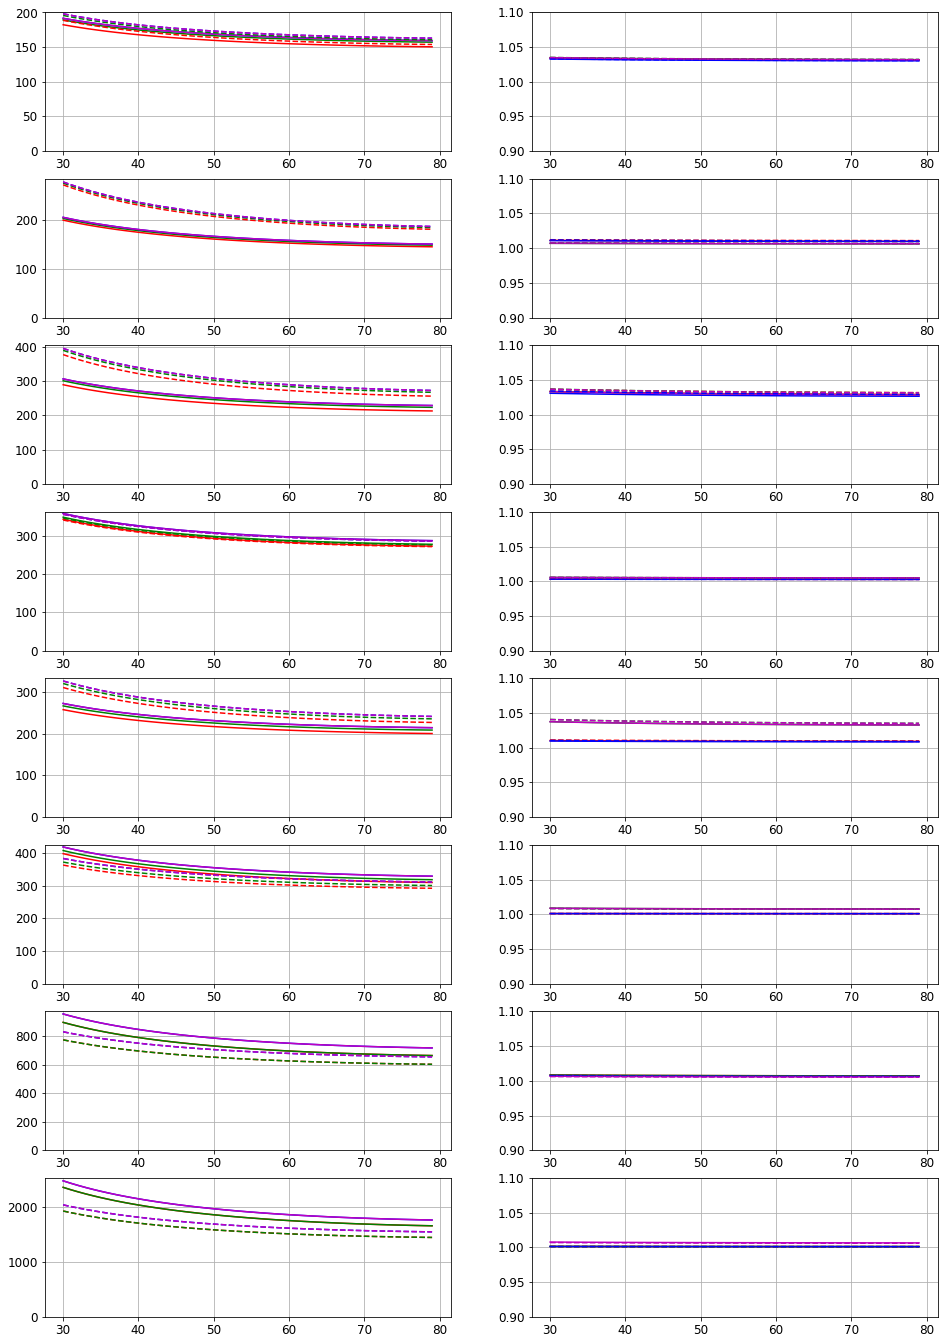

In [94]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [16, 24]

# Read toml_file
filedir = 'Results_20220628/'

channels = ['LF_1', 'LF_2', 'MF_1_1', 'MF_1_2', 'MF_2_1', 'MF_2_2', 'HF_1', 'HF_2']
fig,axs = plt.subplots(8,2)

lcolor={0:'r',1:'g',2:'b',3:'m'}
lstyle = {'Atacama':'-','Pole':'--'}
options = [0,1,2,3]

for site in lstyle.keys():
    for option in options:
        toml_input_file = filedir+'SAT_NET_v_elev_'+site+'_option_'+str(option)+'.toml'
        with open(toml_input_file, "r") as toml_file:
            data = toml.load(toml_file)
    
        ii = 0
        for ch in channels:
            axs[ii][0].plot(data['elev'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option])
            axs[ii][1].plot(data['elev'],data[ch]['corr_factor'],linestyle = lstyle[site], color = lcolor[option])
            ii += 1

for ii in np.arange(8):
    axs[ii][0].set_ylim(0)
    axs[ii][0].grid()
    axs[ii][1].set_ylim(0.9,1.1)
    axs[ii][1].grid()



# Plot NET vs pwv results

Text(0.5, 0.98, 'SAT Single-detector NET vs pwv')

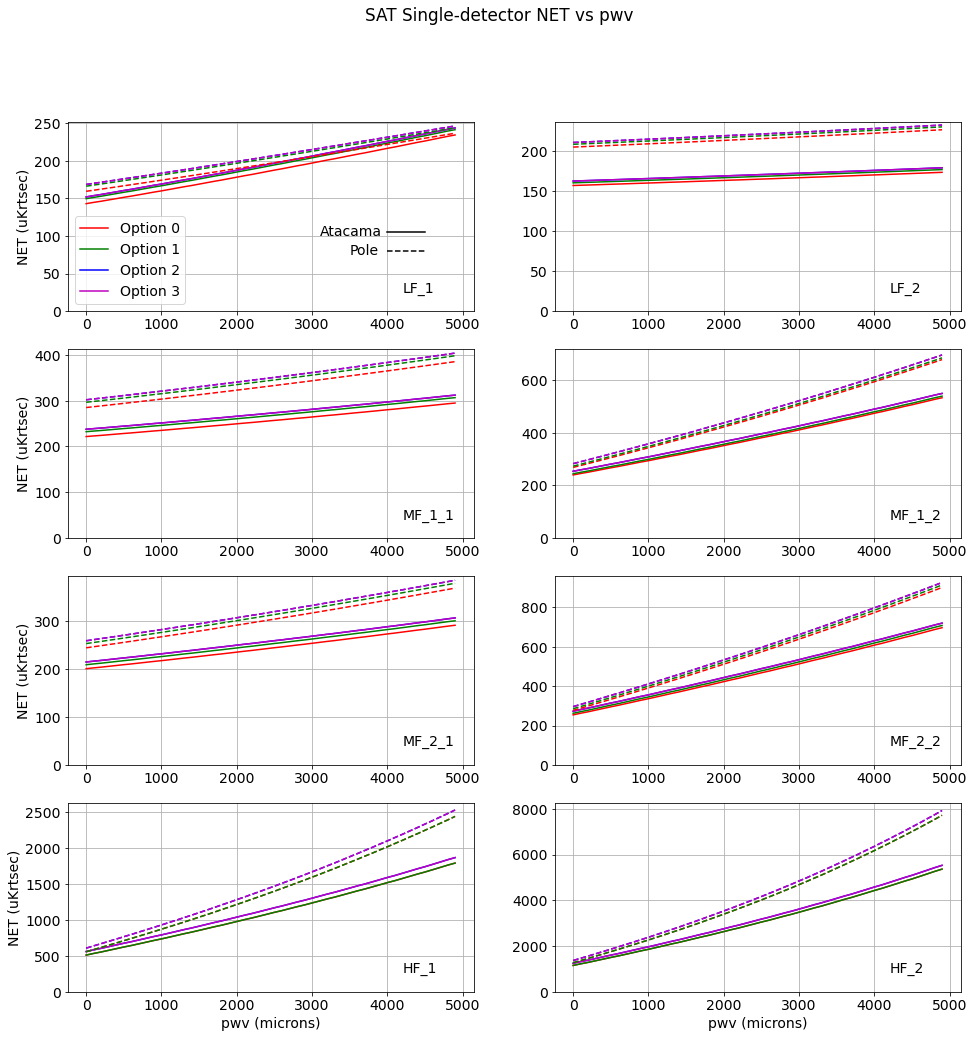

In [96]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 16]

# Read toml_file
filedir = 'Results_20220628/'

tubes = ['LF', 'MF_1', 'MF_2', 'HF']
fig,axs = plt.subplots(4,2)

lcolor={0:'r',1:'g',2:'b',3:'m'}
lstyle = {'Atacama':'-','Pole':'--'}
options = [0,1,2,3]


for site in lstyle.keys():
    for option in options:
        toml_input_file = filedir+'SAT_NET_v_pwv_'+site+'_option_'+str(option)+'.toml'
        labelstr = 'Option ' + str(option)
        with open(toml_input_file, "r") as toml_file:
            data = toml.load(toml_file)
    
        ii = 0
        for tube in tubes:
            ch = tube + '_1'
            if site == 'Atacama':
                axs[ii][0].plot(data['pwv'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option],label=labelstr)
            else:
                axs[ii][0].plot(data['pwv'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option])
            ch = tube + '_2'
            axs[ii][1].plot(data['pwv'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option])
            #axs[ii][1].plot(data['pwv'],data[ch]['corr_factor'],linestyle = lstyle[site], color = lcolor[option])
            ii += 1

for ii in np.arange(4):
    axs[ii][0].set_ylim(0)
    axs[ii][0].grid()
    axs[ii][1].set_ylim(0)
    axs[ii][1].grid()
    axs[ii][0].set_ylabel('NET (uKrtsec)')
    
axs[0][0].text(3500,75,'Pole')
axs[0][0].plot([4000,4500],[80,80],'--k')
axs[0][0].text(3100,100,'Atacama')
axs[0][0].plot([4000,4500],[105,105],'-k')
axs[3][0].set_xlabel('pwv (microns)')
axs[3][1].set_xlabel('pwv (microns)')
axs[0][0].legend()

ii = 0
for tube in tubes:
    aa = axs[ii][0].get_ylim()
    bb = axs[ii][1].get_ylim()
    axs[ii][0].text(4200,aa[1]/10,tube+'_1')
    axs[ii][1].text(4200,bb[1]/10,tube+'_2')
    ii += 1

fig.suptitle('SAT Single-detector NET vs pwv')
    

Text(0.5, 0.98, 'SAT Single-detector NET vs Elevation, at Site 50th%-tile pwv')

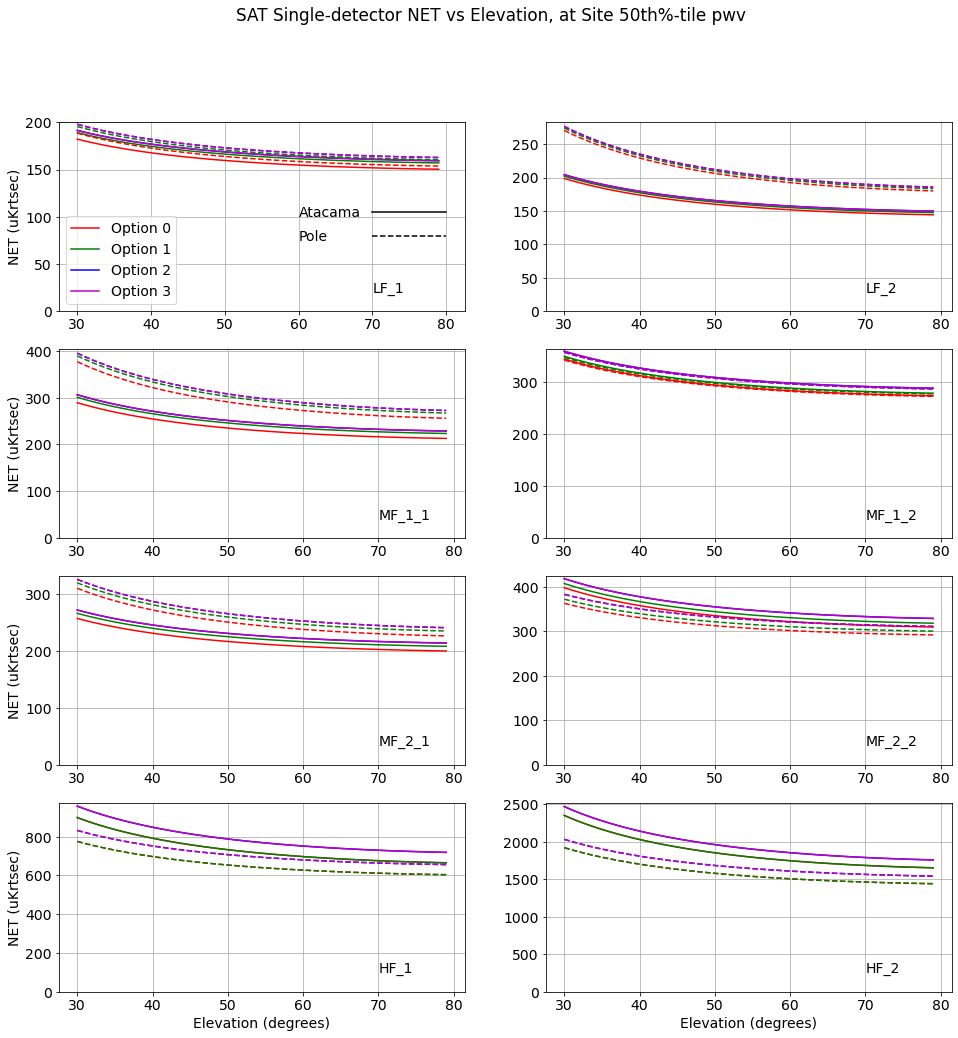

In [101]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16, 16]

# Read toml_file
filedir = 'Results_20220628/'

tubes = ['LF', 'MF_1', 'MF_2', 'HF']
fig,axs = plt.subplots(4,2)

lcolor={0:'r',1:'g',2:'b',3:'m'}
lstyle = {'Atacama':'-','Pole':'--'}
options = [0,1,2,3]


for site in lstyle.keys():
    for option in options:
        toml_input_file = filedir+'SAT_NET_v_elev_'+site+'_option_'+str(option)+'.toml'
        labelstr = 'Option ' + str(option)
        with open(toml_input_file, "r") as toml_file:
            data = toml.load(toml_file)
    
        ii = 0
        for tube in tubes:
            ch = tube + '_1'
            if site == 'Atacama':
                axs[ii][0].plot(data['elev'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option],label=labelstr)
            else:
                axs[ii][0].plot(data['elev'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option])
            ch = tube + '_2'
            axs[ii][1].plot(data['elev'],np.array(data[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site], color = lcolor[option])
            #axs[ii][1].plot(data['pwv'],data[ch]['corr_factor'],linestyle = lstyle[site], color = lcolor[option])
            ii += 1

for ii in np.arange(4):
    axs[ii][0].set_ylim(0)
    axs[ii][0].grid()
    axs[ii][1].set_ylim(0)
    axs[ii][1].grid()
    axs[ii][0].set_ylabel('NET (uKrtsec)')
    
axs[0][0].text(60,75,'Pole')
axs[0][0].plot([70,80],[80,80],'--k')
axs[0][0].text(60,100,'Atacama')
axs[0][0].plot([70,80],[105,105],'-k')
axs[3][0].set_xlabel('Elevation (degrees)')
axs[3][1].set_xlabel('Elevation (degrees)')
axs[0][0].legend()

ii = 0
for tube in tubes:
    aa = axs[ii][0].get_ylim()
    bb = axs[ii][1].get_ylim()
    axs[ii][0].text(70,aa[1]/10,tube+'_1')
    axs[ii][1].text(70,bb[1]/10,tube+'_2')
    ii += 1

fig.suptitle('SAT Single-detector NET vs Elevation, at Site 50th%-tile pwv')
    

# Compare option 0 with PBDR_v2 results

Looking through yaml files, changes include (new vs old):
- window is 2cm (new) rather than 3cm thick (old)
- HF lenses are HDPE (new) rather than silicon (old)
- cold (lyot) stop absorptions are calculated by SAT group/Sara Simons, rather than Gaussian approximation
- f/# is 1.45 (new) rather than 1.55 (old).  This should only affect the old calc of cold stop spillover.
- both are flat bands, but edges specified in different ways (edges for new, center + fractional bandwidth for old), leading to very small band edge differences (order 0.1GHz at most in band center and 0.001 or so in fractional bandwidth, typically much less than these).


Text(0.5, 0.98, 'SAT Single-detector NET vs pwv (Pole baseline)')

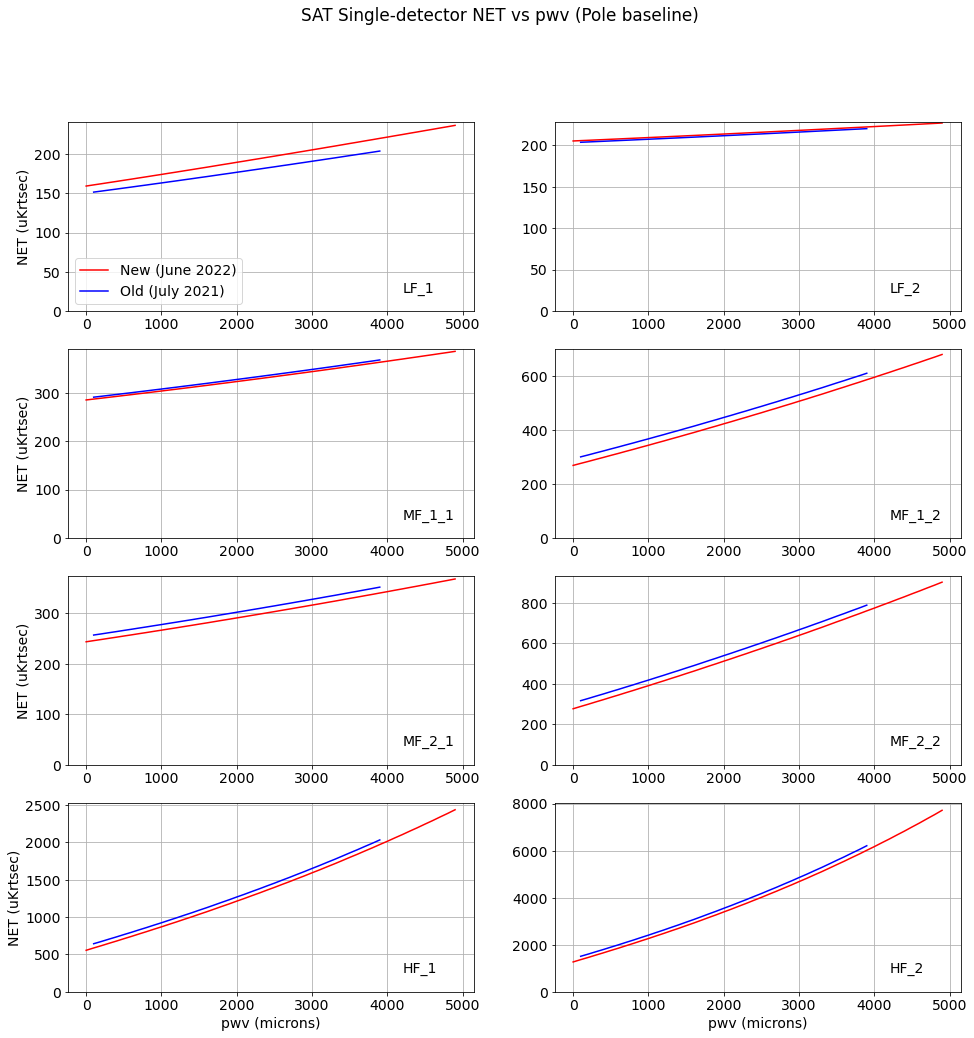

In [93]:
option = 0
newtubes = ['LF', 'MF_1', 'MF_2', 'HF']
oldtubes = ['LF', 'MF1', 'MF2', 'HF']
fig,axs = plt.subplots(4,2)

lcolor={0:'r',1:'g',2:'b',3:'m'}
lstyle = {'Atacama':'--','Pole':'-'}

filedir = 'Results_20220628/'

for site in ['Pole']:
    toml_input_file_new = filedir+'SAT_NET_v_pwv_'+site+'_option_'+str(option)+'.toml'
    labelstr = site
    with open(toml_input_file_new, "r") as toml_file:
        data_new = toml.load(toml_file)
            
    toml_input_file_old = '../../bolo-calc/pbdr_v2/outputs_july27/NET_v_pwv.toml'
    with open(toml_input_file_old, "r") as toml_file:
        data_old = toml.load(toml_file) 
    for ii in np.arange(4):
        ch = newtubes[ii] + '_1'
        axs[ii][0].plot(data_new['pwv'],np.array(data_new[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site],color='r',label='New (June 2022)')
        ch = newtubes[ii] + '_2'
        axs[ii][1].plot(data_new['pwv'],np.array(data_new[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site],color='r',label='New (June 2022)')

        if oldtubes[ii]=='HF':
            ch = oldtubes[ii] + '_1'
            axs[ii][0].plot(data_old["SAT_HF_20210714.yaml"][ch]['pwv'],np.array(data_old["SAT_HF_20210714.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
            ch = oldtubes[ii] + '_2'
            axs[ii][1].plot(data_old["SAT_HF_20210714.yaml"][ch]['pwv'],np.array(data_old["SAT_HF_20210714.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
        else:
            ch = oldtubes[ii] + '_1'
            axs[ii][0].plot(data_old['SAT_LFMF_20210714.yaml'][ch]['pwv'],np.array(data_old['SAT_LFMF_20210714.yaml'][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
            ch = oldtubes[ii] + '_2'
            axs[ii][1].plot(data_old["SAT_LFMF_20210714.yaml"][ch]['pwv'],np.array(data_old["SAT_LFMF_20210714.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')

        ii +=1
        
for ii in np.arange(4):
    axs[ii][0].set_ylim(0)
    axs[ii][0].grid()
    axs[ii][1].set_ylim(0)
    axs[ii][1].grid()
    axs[ii][0].set_ylabel('NET (uKrtsec)')
    

axs[3][0].set_xlabel('pwv (microns)')
axs[3][1].set_xlabel('pwv (microns)')
axs[0][0].legend(loc='lower left')

ii = 0
for tube in tubes:
    aa = axs[ii][0].get_ylim()
    bb = axs[ii][1].get_ylim()
    axs[ii][0].text(4200,aa[1]/10,tube+'_1')
    axs[ii][1].text(4200,bb[1]/10,tube+'_2')
    ii += 1

fig.suptitle('SAT Single-detector NET vs pwv (Pole baseline)')


# Compare option 0 with PBDR_v3 results

Looking through yaml files, changes include (new vs old):

- window is 2cm (new) rather than 3cm thick (old)
- HF lenses are HDPE (new) rather than silicon (old)
- cold (lyot) stop absorptions are taken from Paul Grimes' spreadsheet, which sets:
  - MF1 as calculated by SAT group/Sara Simons, new is same as old, 
  - LF and HF set to be same as MF1, rather than gaussian approximations (old),
  - MF2 calculated by SAT group/Sara Simons, but revised numbers from old version in MF2_1 (from 0.125 to 0.141)
- f/# is 1.45 (new) rather than 1.55 (old). This should only affect the old calc of cold stop spillover in cases where the gaussian approximation is used.

Both are flat bands, but edges specified in different ways (edges for new, center + fractional bandwidth for old), leading to very small band edge differences (order 0.1GHz at most in band center and 0.001 or so in fractional bandwidth, typically much less than these).

Running with same window thickness shows nearly identical results at LF, MF.  HF slightly different still, presumably due to different spillover calc on cold stop.

Text(0.5, 0.98, 'SAT Single-detector NET vs pwv (Pole baseline)')

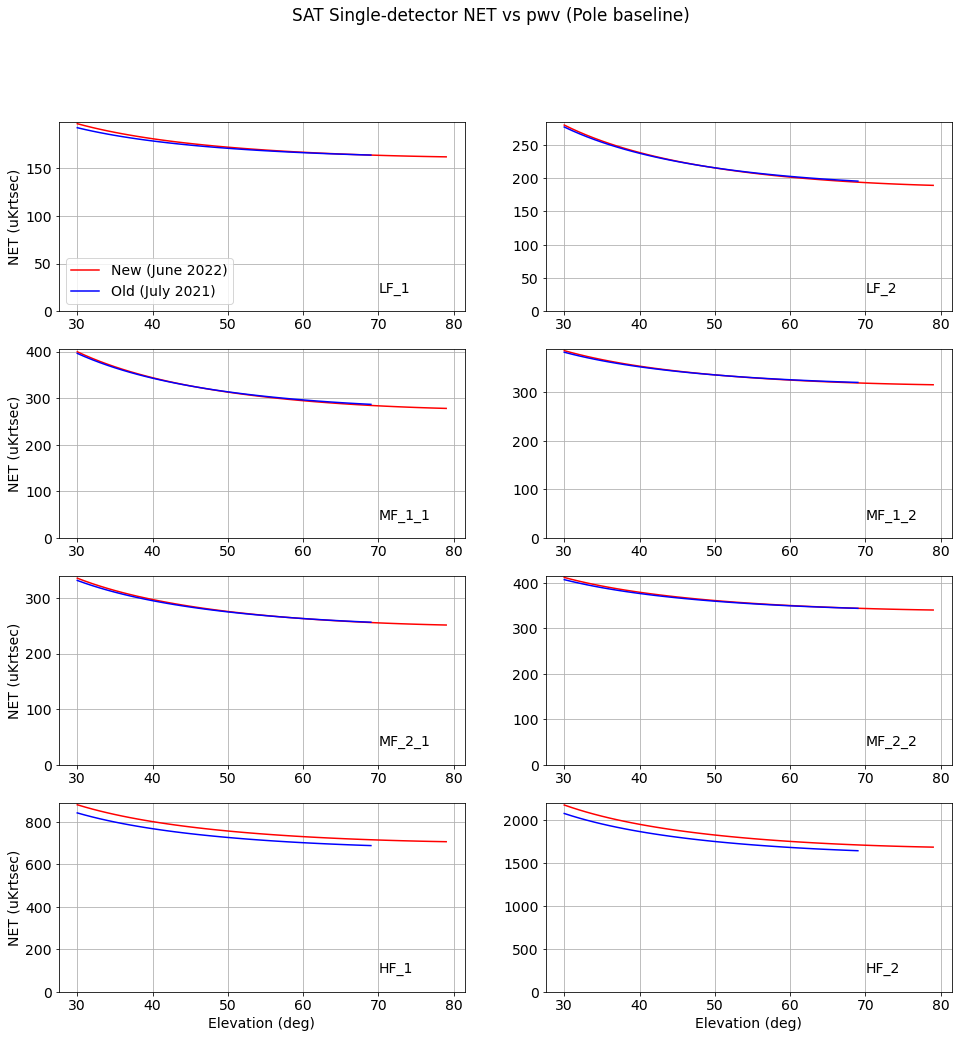

In [92]:
option = 0
newtubes = ['LF', 'MF_1', 'MF_2', 'HF']
oldtubes = ['LF', 'MF1', 'MF2', 'HF']
fig,axs = plt.subplots(4,2)

lcolor={0:'r',1:'g',2:'b',3:'m'}
lstyle = {'Atacama':'--','Pole':'-'}

filedir = 'Results_20220628/'

for site in ['Pole']:
    toml_input_file_new = filedir+'SAT_NET_v_elev_'+site+'_option_'+str(option)+'.toml'
    labelstr = site
    with open(toml_input_file_new, "r") as toml_file:
        data_new = toml.load(toml_file)
            
    toml_input_file_old = '../../bolo-calc/pbdr_v3/outputs/NET_v_elevation.toml'
    with open(toml_input_file_old, "r") as toml_file:
        data_old = toml.load(toml_file) 
    for ii in np.arange(4):
        ch = newtubes[ii] + '_1'
        axs[ii][0].plot(data_new['elev'],np.array(data_new[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site],color='r',label='New (June 2022)')
        ch = newtubes[ii] + '_2'
        axs[ii][1].plot(data_new['elev'],np.array(data_new[ch]['NET_NC'])*1.0e6,linestyle = lstyle[site],color='r',label='New (June 2022)')

        if oldtubes[ii]=='HF':
            ch = oldtubes[ii] + '_1'
            axs[ii][0].plot(data_old["SAT_HF_20210714.yaml"][ch]['elevation'],np.array(data_old["SAT_HF_20210714.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
            ch = oldtubes[ii] + '_2'
            axs[ii][1].plot(data_old["SAT_HF_20210714.yaml"][ch]['elevation'],np.array(data_old["SAT_HF_20210714.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
        elif (oldtubes[ii]=='MF1' or oldtubes[ii]=='MF2'):
            ch = oldtubes[ii] + '_1'
            axs[ii][0].plot(data_old['SAT_MF_20211015.yaml'][ch]['elevation'],np.array(data_old['SAT_MF_20211015.yaml'][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
            ch = oldtubes[ii] + '_2'
            axs[ii][1].plot(data_old["SAT_MF_20211015.yaml"][ch]['elevation'],np.array(data_old["SAT_MF_20211015.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
        elif oldtubes[ii]=='LF':
            ch = oldtubes[ii] + '_1'
            axs[ii][0].plot(data_old['SAT_LF_20211015.yaml'][ch]['elevation'],np.array(data_old['SAT_LF_20211015.yaml'][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
            ch = oldtubes[ii] + '_2'
            axs[ii][1].plot(data_old["SAT_LF_20211015.yaml"][ch]['elevation'],np.array(data_old["SAT_LF_20211015.yaml"][ch]['NET']),linestyle = lstyle[site],color='blue',label='Old (July 2021)')
        else:
            print('tube error')
        
        ii +=1
        
for ii in np.arange(4):
    axs[ii][0].set_ylim(0)
    axs[ii][0].grid()
    axs[ii][1].set_ylim(0)
    axs[ii][1].grid()
    axs[ii][0].set_ylabel('NET (uKrtsec)')
    

axs[3][0].set_xlabel('Elevation (deg)')
axs[3][1].set_xlabel('Elevation (deg)')
axs[0][0].legend(loc='lower left')

ii = 0
for tube in tubes:
    aa = axs[ii][0].get_ylim()
    bb = axs[ii][1].get_ylim()
    axs[ii][0].text(70,aa[1]/10,tube+'_1')
    axs[ii][1].text(70,bb[1]/10,tube+'_2')
    ii += 1

fig.suptitle('SAT Single-detector NET vs pwv (Pole baseline)')


In [89]:
sim['optical_elements']['window']['thickness']

0.02

In [78]:
data_old['SAT_LF_20211015.yaml'].keys()

dict_keys(['LF_1', 'LF_2'])